In [2]:
library(dplyr)
library(xts)
library(TTR)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 


Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last




In [6]:
df = read.csv("../data/Daily_Demand_Forecasting_Orders.csv",sep=";")
head(df)
dim(df)

Week.of.the.month..first.week..second..third..fourth.or.fifth.week,Day.of.the.week..Monday.to.Friday.,Non.urgent.order,Urgent.order,Order.type.A,Order.type.B,Order.type.C,Fiscal.sector.orders,Orders.from.the.traffic.controller.sector,Banking.orders..1.,Banking.orders..2.,Banking.orders..3.,Target..Total.orders.
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364


[1] 60 13

In [10]:
orders <- df[,c(1,2,13)]
names(orders) <- c("week","weekday","total")

In [11]:
head(orders)

week,weekday,total
<int>,<int>,<dbl>
1,4,539.577
1,5,224.675
1,6,129.412
2,2,317.120
2,3,210.517
2,4,207.364


In [12]:
order.ts <-ts(orders$total,start=1,end=60,frequency=5)
head(order.ts)

[1] 539.577 224.675 129.412 317.120 210.517 207.364

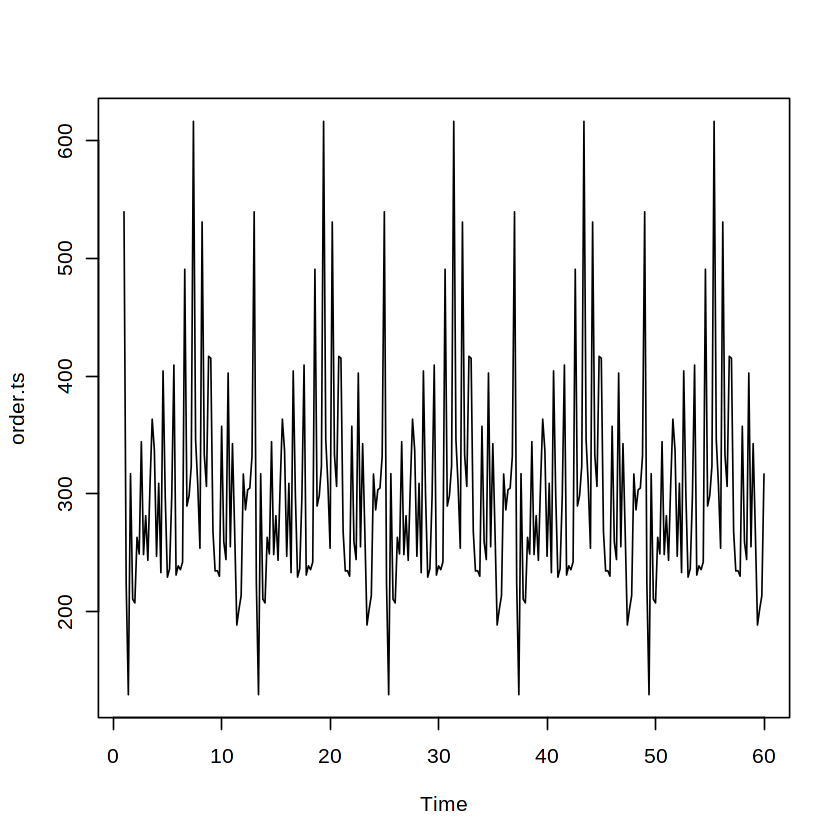

In [13]:
plot(order.ts)

In [14]:
ma5 <-TTR::SMA(order.ts,n=5)

In [25]:
ma2 <-TTR::SMA(order.ts,n=2)

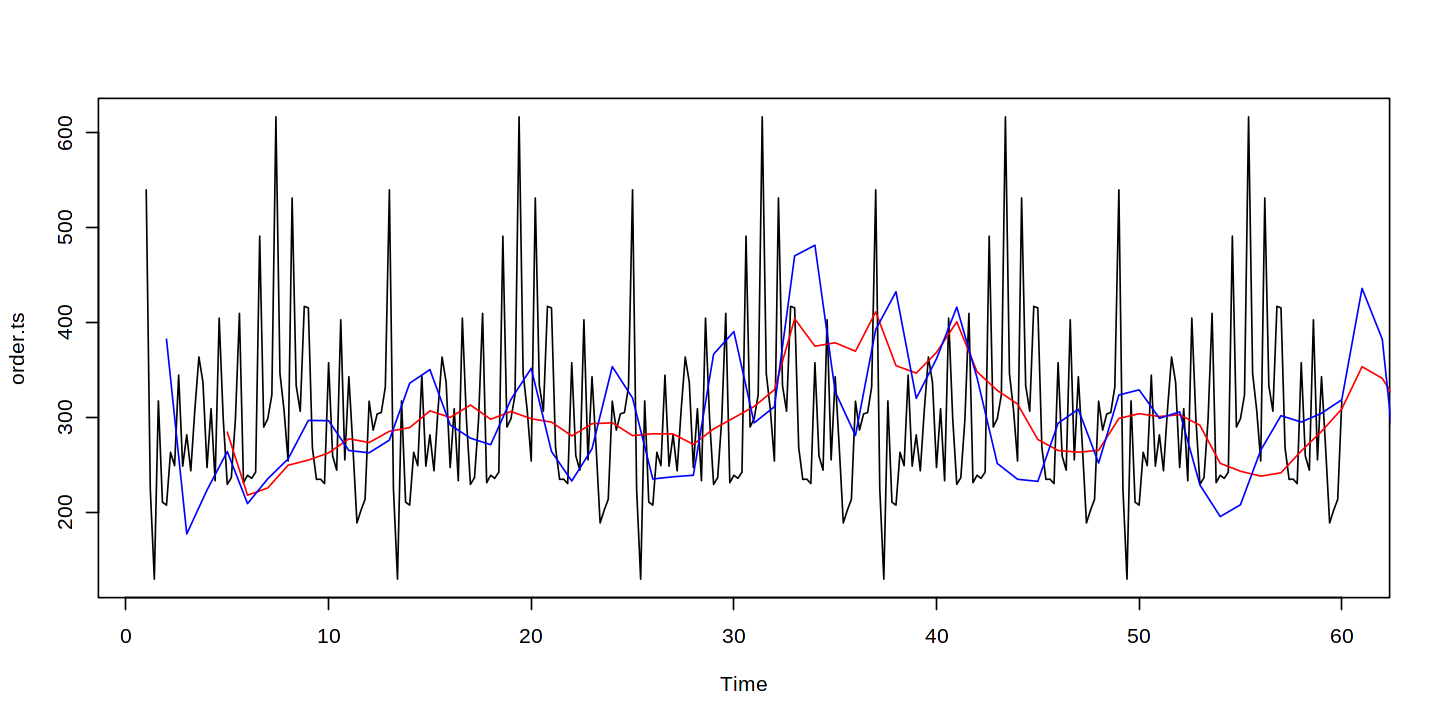

In [26]:
options(repr.plot.width=12,repr.plot.height=6)
plot(order.ts)
lines(ma5,col="red")
lines(ma2,col="blue")

In [22]:
stationary_order <- decompose(order.ts)

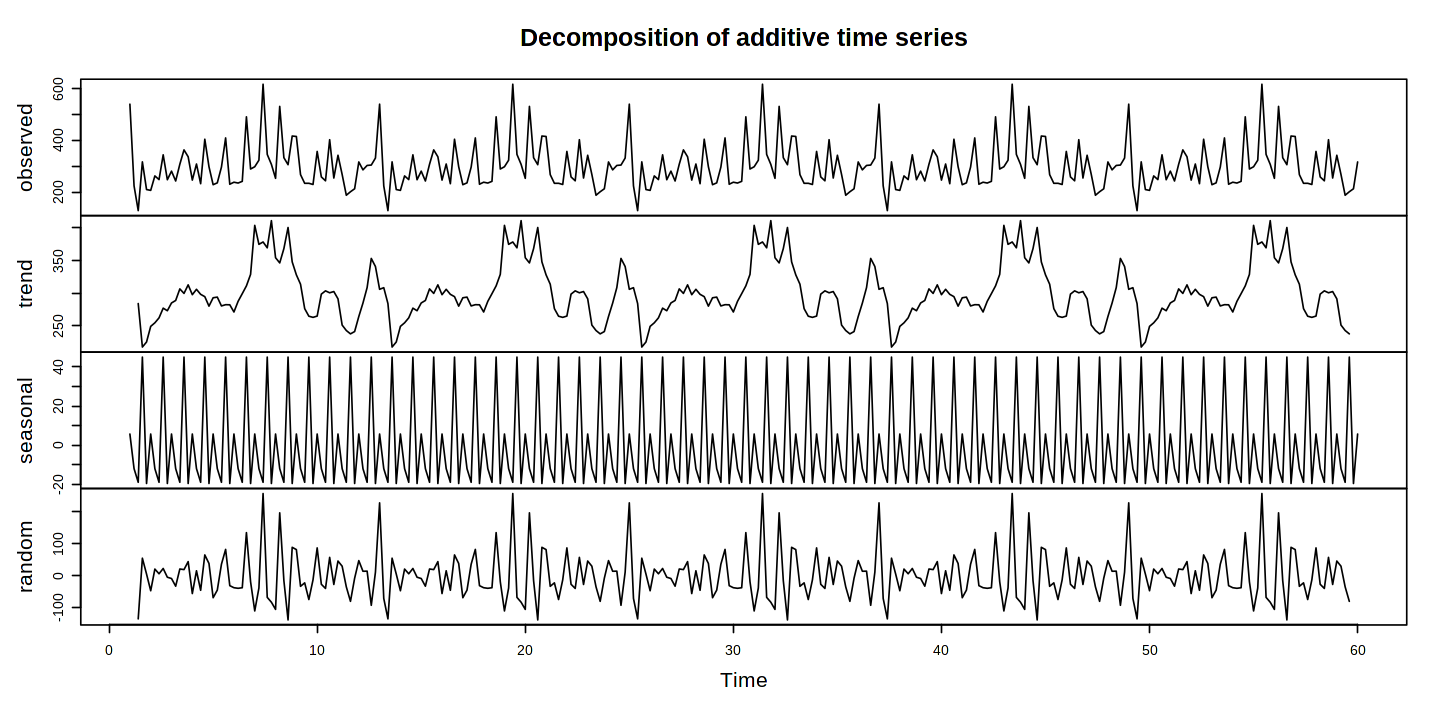

In [23]:
plot(stationary_order)

In [27]:
matrix(stationary_order$seasonal,ncol=5,byrow=T)

Warning message in matrix(stationary_order$seasonal, ncol = 5, byrow = T):
“data length [296] is not a sub-multiple or multiple of the number of rows [60]”


5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129


In [28]:
stationary_order$seasonal[1:5]

[1]   5.657766 -12.030448 -19.004986  44.988957 -19.611289

In [31]:
season1<- data.frame(weekday=c(4,5,6,2,3),
                    season=stationary_order$seasonal[1:5])

In [32]:
head(season1)

weekday,season
<dbl>,<dbl>
4,5.657766
5,-12.030448
6,-19.004986
2,44.988957
3,-19.611289


In [33]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff



In [34]:
order_fit <-auto.arima(order.ts)
order_fit

Series: order.ts 
ARIMA(1,0,0)(1,0,0)[5] with non-zero mean 

Coefficients:
         ar1    sar1      mean
      0.0789  0.0912  300.7418
s.e.  0.0588  0.0592    6.1510

sigma^2 estimated as 7955:  log likelihood=-1747.8
AIC=3503.6   AICc=3503.73   BIC=3518.36

In [36]:
pred <- forecast(order_fit)

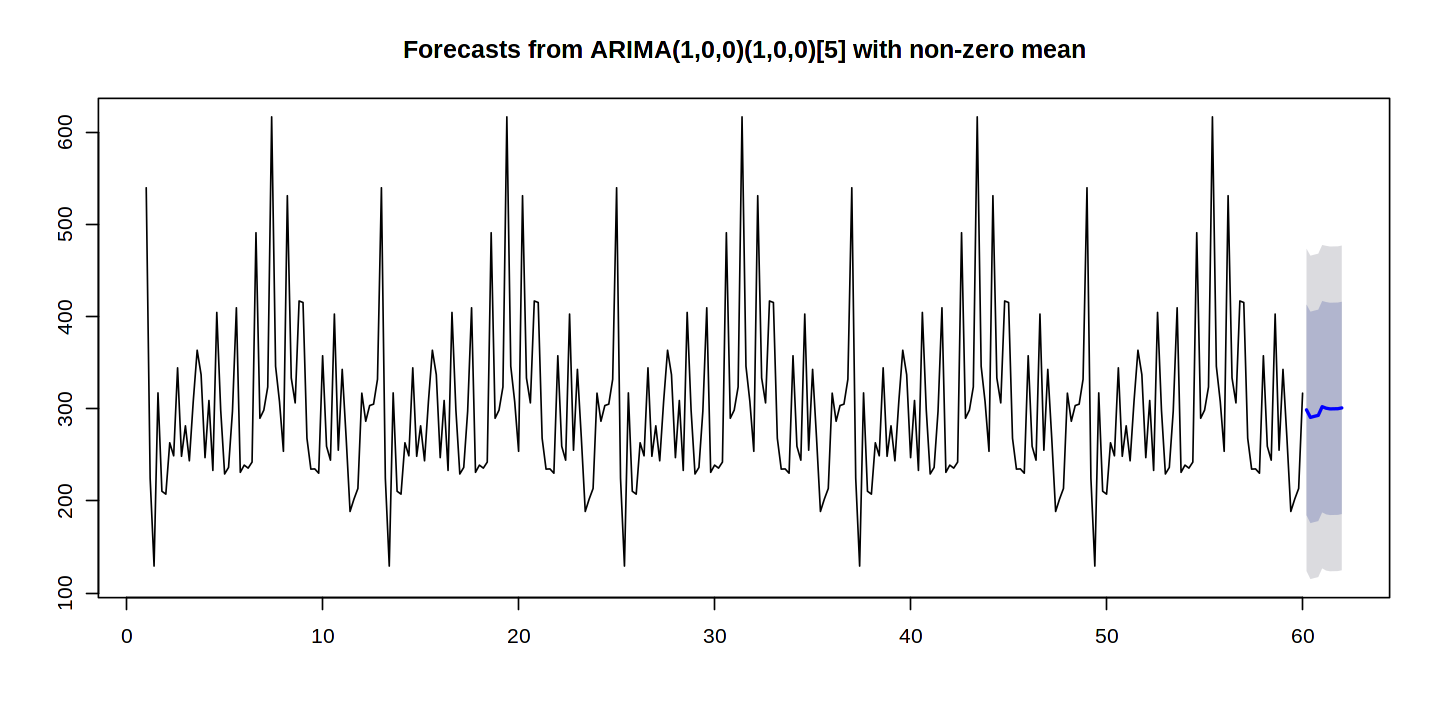

In [37]:
plot(pred)